In [272]:
import polars as pl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

<h3>Destinating Peices</h3>

In [2]:
destinatingPeices1 = pl.read_csv('../../Data/Mail_v2/Destinating Pieces pt.1 v2.csv', infer_schema_length=int(1e10))


In [3]:
destinatingPeices1.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,dzip3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
34242246,34242246,34242246,34242246,34242246,34242246,34242246,34242246,34242246,34242246


In [4]:
destinatingPeices2 = pl.read_csv('../../Data/Mail_v2/Destinating Pieces pt.2 v2.csv', infer_schema_length=int(1e10))

In [5]:
destinatingPeices2.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,dzip3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
19490878,19490878,19490878,19490878,19490878,19490878,19490878,19490878,19490878,19490878


In [6]:
destinatingPeices = pl.concat([destinatingPeices1, destinatingPeices2], how = 'vertical')

In [7]:
destinatingPeices.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,dzip3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
53733124,53733124,53733124,53733124,53733124,53733124,53733124,53733124,53733124,53733124


In [8]:
#find count of null values
destinatingPeices.null_count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,dzip3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0


In [9]:
# find count of rows with the word 'null'
print('# of rows with "null" value')
for x in destinatingPeices.columns:
    if str(destinatingPeices[x].dtype) == 'String':
        filtered_df = destinatingPeices.filter(pl.col(x) == 'null')
        count = filtered_df[x].count()
        print("{} = {}".format(x, count))

# of rows with "null" value
START_THE_CLOCK_DATE = 6673631
ORIGIN_FACILITY = 0
OZIP3 = 2674
ACTUAL_DLVRY_DATE = 0
EXPECTED_DELIVERY_DATE = 6673631
EXPECTED_DESTINATION_FACILITY = 0
MAIL_CLASS = 0
MAIL_SHAPE = 0


In [10]:
#remove null values from the dataset
destinatingPeices_noNull = destinatingPeices.filter((pl.col('START_THE_CLOCK_DATE') != 'null') &
                                                      (pl.col('OZIP3') != 'null') &
                                                      (pl.col('EXPECTED_DELIVERY_DATE') != 'null'))

In [11]:
destinatingPeices_noNull.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,dzip3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
47058984,47058984,47058984,47058984,47058984,47058984,47058984,47058984,47058984,47058984


In [12]:
# count the number of records associated with each unique id
duplicate_counts = destinatingPeices_noNull['UNIQUE_IDENTIFIER'].value_counts(sort=True)
duplicate_counts.head()

UNIQUE_IDENTIFIER,count
i64,u32
21040650000001,43
21087440000001,28
21110390000001,27
21102930000001,26
21041020000001,26


In [13]:
duplicate_ids = duplicate_counts.filter(pl.col('count') > 1)

In [14]:
duplicate_ids.head()

UNIQUE_IDENTIFIER,count
i64,u32
21040650000001,43
21087440000001,28
21110390000001,27
21102930000001,26
21041020000001,26


In [15]:
duplicate_ids.count()

UNIQUE_IDENTIFIER,count
u32,u32
614,614


In [16]:
duplicate_ids_list = duplicate_ids['UNIQUE_IDENTIFIER'].to_list()

In [17]:
duplicateRecords = destinatingPeices_noNull.filter(pl.col('UNIQUE_IDENTIFIER').is_in(duplicate_ids_list))

In [18]:
duplicateRecords.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,dzip3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
3693,3693,3693,3693,3693,3693,3693,3693,3693,3693


In [19]:
non_duplicate_ids = duplicate_counts.filter(pl.col('count') == 1)

In [20]:
list_nonDupIds = non_duplicate_ids['UNIQUE_IDENTIFIER'].to_list()

In [21]:
destinatingPeices_noDups = destinatingPeices.filter(pl.col('UNIQUE_IDENTIFIER').is_in(list_nonDupIds))

In [22]:
destinatingPeices_noDups.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,dzip3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
47055291,47055291,47055291,47055291,47055291,47055291,47055291,47055291,47055291,47055291


In [23]:
destinatingPeices_noDups.filter(pl.col('ACTUAL_DLVRY_DATE') < pl.col('START_THE_CLOCK_DATE')).count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,dzip3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
388444,388444,388444,388444,388444,388444,388444,388444,388444,388444


In [24]:
destinatingPeices_final = destinatingPeices_noDups.filter(pl.col('ACTUAL_DLVRY_DATE') > pl.col('START_THE_CLOCK_DATE'))

In [25]:
destinatingPeices_final.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,dzip3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
44716693,44716693,44716693,44716693,44716693,44716693,44716693,44716693,44716693,44716693


In [26]:
destinatingPeices_final.group_by('EXPECTED_DESTINATION_FACILITY').len()

EXPECTED_DESTINATION_FACILITY,len
str,u32
"""NASHVILLE - 1441275""",24657491
"""MUSIC CITY ANNEX - 1532174""",3534969
"""MEMPHIS - 1441274""",16524233


In [27]:
destinatingPeices_final['START_THE_CLOCK_DATE'].n_unique()

111

In [28]:
destinatingPeices_final['ORIGIN_FACILITY'].n_unique()

1267

In [29]:
destinatingPeices_final['ACTUAL_DLVRY_DATE'].n_unique()

11

In [30]:
d1 = destinatingPeices_final.group_by('ACTUAL_DLVRY_DATE').len()

In [31]:
d1 = d1.select(pl.col(['ACTUAL_DLVRY_DATE', 'len']).sort_by('ACTUAL_DLVRY_DATE'))

In [32]:
with pl.Config(tbl_rows=20):
    print(d1)

shape: (11, 2)
┌───────────────────┬─────────┐
│ ACTUAL_DLVRY_DATE ┆ len     │
│ ---               ┆ ---     │
│ str               ┆ u32     │
╞═══════════════════╪═════════╡
│ 2024-01-08        ┆ 6750093 │
│ 2024-01-09        ┆ 3863290 │
│ 2024-01-10        ┆ 3830652 │
│ 2024-01-11        ┆ 4482923 │
│ 2024-01-12        ┆ 4321727 │
│ 2024-01-13        ┆ 5215929 │
│ 2024-01-16        ┆ 4958703 │
│ 2024-01-17        ┆ 2993910 │
│ 2024-01-18        ┆ 2797221 │
│ 2024-01-19        ┆ 2594319 │
│ 2024-01-20        ┆ 2907926 │
└───────────────────┴─────────┘


In [33]:
d1 = destinatingPeices_final.group_by('ACTUAL_DLVRY_DATE').len()

In [34]:
d1 = d1.select(pl.col(['ACTUAL_DLVRY_DATE', 'len']).sort_by('ACTUAL_DLVRY_DATE'))

In [35]:
with pl.Config(tbl_rows=20):
    print(d1)

shape: (11, 2)
┌───────────────────┬─────────┐
│ ACTUAL_DLVRY_DATE ┆ len     │
│ ---               ┆ ---     │
│ str               ┆ u32     │
╞═══════════════════╪═════════╡
│ 2024-01-08        ┆ 6750093 │
│ 2024-01-09        ┆ 3863290 │
│ 2024-01-10        ┆ 3830652 │
│ 2024-01-11        ┆ 4482923 │
│ 2024-01-12        ┆ 4321727 │
│ 2024-01-13        ┆ 5215929 │
│ 2024-01-16        ┆ 4958703 │
│ 2024-01-17        ┆ 2993910 │
│ 2024-01-18        ┆ 2797221 │
│ 2024-01-19        ┆ 2594319 │
│ 2024-01-20        ┆ 2907926 │
└───────────────────┴─────────┘


In [36]:
destinatingPeices_final['EXPECTED_DELIVERY_DATE'].n_unique()

116

In [37]:
destinatingPeices_final.group_by('EXPECTED_DELIVERY_DATE').len()

EXPECTED_DELIVERY_DATE,len
str,u32
"""2023-11-20""",20
"""2024-01-02""",125447
"""2023-12-18""",10567
"""2023-10-25""",1
"""2023-12-19""",4888
…,…
"""2023-12-02""",45
"""2023-12-12""",3716
"""2024-01-24""",21703


In [38]:
destinatingPeices_final['EXPECTED_DELIVERY_DATE'].min()

'2023-08-25'

In [39]:
destinatingPeices_final['EXPECTED_DELIVERY_DATE'].max()

'2024-02-07'

In [40]:
destinatingPeices_final['MAIL_CLASS'].n_unique()

4

In [41]:
destinatingPeices_final.group_by('MAIL_CLASS').len()

MAIL_CLASS,len
str,u32
"""Periodicals""",789234
"""Single Piece First Class""",6677212
"""First Class Presort""",15481257
"""USPS Marketing Mail""",21768990


In [42]:
destinatingPeices_final['MAIL_SHAPE'].n_unique()

3

In [43]:
destinatingPeices_final.group_by('MAIL_SHAPE').len()

MAIL_SHAPE,len
str,u32
"""Flat""",4990079
"""Card""",1011975
"""Letter""",38714639


In [44]:
destinatingPeices_final.group_by(['MAIL_CLASS', 'MAIL_SHAPE']).len().select(pl.col(['MAIL_CLASS', 'MAIL_SHAPE', 'len']).sort_by(['MAIL_CLASS', 'MAIL_SHAPE']))

MAIL_CLASS,MAIL_SHAPE,len
str,str,u32
"""First Class Presort""","""Card""",1011975
"""First Class Presort""","""Flat""",184609
"""First Class Presort""","""Letter""",14284673
"""Periodicals""","""Flat""",786870
"""Periodicals""","""Letter""",2364
"""Single Piece First Class""","""Flat""",1285818
"""Single Piece First Class""","""Letter""",5391394
"""USPS Marketing Mail""","""Flat""",2732782
"""USPS Marketing Mail""","""Letter""",19036208


<h3>Destinating Scans</h3>

In [45]:
destinatingScans1 = pl.read_csv('../../Data/Scan Data/Mail/Destinating Scans pt. 1.csv', infer_schema_length=int(1e10))

In [46]:
destinatingScans2 = pl.read_csv('../../Data/Scan Data/Mail/Destinating Scans pt. 2.csv', infer_schema_length=int(1e10))

In [47]:
destinatingScans3 = pl.read_csv('../../Data/Scan Data/Mail/Destinating Scans pt. 3.csv', infer_schema_length=int(1e10))

In [48]:
destinatingScans = pl.concat([destinatingScans1, destinatingScans2, destinatingScans3], how = 'vertical')

In [49]:
destinatingScans.count()

UNIQUE_IDENTIFIER,scan_datetime,scan_facility,op_code
u32,u32,u32,u32
139005571,139005571,139005571,139005571


In [50]:
destinatingScans.null_count()

UNIQUE_IDENTIFIER,scan_datetime,scan_facility,op_code
u32,u32,u32,u32
0,0,0,0


In [51]:
print('# of rows with "null" value')
for x in destinatingScans.columns:
    if str(destinatingScans[x].dtype) == 'String':
        filtered_df = destinatingScans.filter(pl.col(x) == 'null')
        count = filtered_df[x].count()
        print("{} = {}".format(x, count))

# of rows with "null" value
scan_datetime = 1599
scan_facility = 59362
op_code = 224992


In [52]:
destinatingScans_noNulls = destinatingScans.filter((pl.col('scan_datetime') != 'null') &
                                                     (pl.col('scan_facility') != 'null') &
                                                     (pl.col('op_code') != 'null'))

In [53]:
destinatingScans_noNulls.count()

UNIQUE_IDENTIFIER,scan_datetime,scan_facility,op_code
u32,u32,u32,u32
138722816,138722816,138722816,138722816


In [54]:
destinatingScans_noNulls.n_unique()

138722816

In [55]:
print('# of unique values in each column')
for x in destinatingScans_noNulls.columns:
    count = destinatingScans_noNulls[x].n_unique()
    print("{} = {}".format(x, count))

# of unique values in each column
UNIQUE_IDENTIFIER = 53621334
scan_datetime = 2063170
scan_facility = 369
op_code = 228


In [56]:
destinatingScans_noNulls['scan_datetime'].min()

'2023-08-22 23:09:59'

In [57]:
destinatingScans_noNulls['scan_datetime'].max()

'2024-06-03 09:28:51'

In [58]:
opsCodes = pd.read_excel('../usps_opscodes.xlsx', header = 1, sheet_name='OpCodes')

In [59]:
opsCodes = opsCodes['Operation Code'].to_list()

In [60]:
cleanedCodes = [x for x in opsCodes if str(x) != 'nan']

In [61]:
cleanedCodes = [int(x) for x in cleanedCodes]

In [63]:
destinatingScans_0 = destinatingScans_noNulls.select(pl.col('UNIQUE_IDENTIFIER'),
                                                     pl.col('scan_datetime'),
                                                     pl.col('scan_facility'),
                                                     pl.col('op_code').cast(pl.Int64))

In [64]:
destinatingScans_1 = destinatingScans_0.filter(pl.col('op_code').is_in(cleanedCodes))

In [65]:
destinatingScans_1.count()

UNIQUE_IDENTIFIER,scan_datetime,scan_facility,op_code
u32,u32,u32,u32
126286017,126286017,126286017,126286017


In [66]:
print('# of unique values in each column')
for x in destinatingScans_1.columns:
    count = destinatingScans_1[x].n_unique()
    print("{} = {}".format(x, count))

# of unique values in each column
UNIQUE_IDENTIFIER = 53269421
scan_datetime = 2050263
scan_facility = 354
op_code = 172


In [67]:
destinatingTotalScanInterval = destinatingScans_1.group_by('UNIQUE_IDENTIFIER').agg([pl.max('scan_datetime').alias('maxScan'),
                                                      pl.min('scan_datetime').alias('minScan')])

In [70]:
destinatingFacilityScanInterval = destinatingScans_1.group_by(['UNIQUE_IDENTIFIER', 'scan_facility']).agg([pl.max('scan_datetime').alias('maxScan'),
                                                      pl.min('scan_datetime').alias('minScan')])

<h3>Originating Pieces</h3>

In [73]:
originatingPeices1 = pl.read_csv('../../Data/Mail_v2/Originating Pieces pt.1 v2.csv', infer_schema_length=int(1e10))

In [74]:
originatingPeices1.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,DZIP3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
22653310,22653310,22653310,22653310,22653310,22653310,22653310,22653310,22653310,22653310


In [75]:
originatingPeices2 = pl.read_csv('../../Data/Mail_v2/Originating Pieces pt.2 v2.csv', infer_schema_length=int(1e10))

In [76]:
originatingPeices2.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,DZIP3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
19521636,19521636,19521636,19521636,19521636,19521636,19521636,19521636,19521636,19521636


In [77]:
originatingPeices = pl.concat([originatingPeices1, originatingPeices2], how = 'vertical')

In [78]:
originatingPeices.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,DZIP3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
42174946,42174946,42174946,42174946,42174946,42174946,42174946,42174946,42174946,42174946


In [80]:
originatingPeices.null_count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,DZIP3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0


In [81]:
# find count of rows with the word 'null'
print('# of rows with "null" value')
for x in originatingPeices.columns:
    if str(originatingPeices[x].dtype) == 'String':
        filtered_df = originatingPeices.filter(pl.col(x) == 'null')
        count = filtered_df[x].count()
        print("{} = {}".format(x, count))

# of rows with "null" value
START_THE_CLOCK_DATE = 0
ORIGIN_FACILITY = 0
ACTUAL_DLVRY_DATE = 973625
EXPECTED_DELIVERY_DATE = 23484
EXPECTED_DESTINATION_FACILITY = 41118
MAIL_CLASS = 0
MAIL_SHAPE = 0


In [82]:
originatingPeices_noNulls = originatingPeices.filter((pl.col('ACTUAL_DLVRY_DATE') != 'null') &
                                                     (pl.col('EXPECTED_DELIVERY_DATE') != 'null') &
                                                     (pl.col('EXPECTED_DESTINATION_FACILITY') != 'null'))

In [83]:
originatingPeices_noNulls.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,DZIP3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
41160323,41160323,41160323,41160323,41160323,41160323,41160323,41160323,41160323,41160323


In [84]:
# count the number of records associated with each unique id
duplicate_counts_originating = originatingPeices_noNulls['UNIQUE_IDENTIFIER'].value_counts(sort=True)
duplicate_counts_originating.head()

UNIQUE_IDENTIFIER,count
i64,u32
21202680000001,79
21071570000001,31
21061070000001,26
21064440000001,18
21193190000001,14


In [85]:
duplicate_ids_originating = duplicate_counts_originating.filter(pl.col('count') > 1)

In [86]:
duplicate_ids_originating.count()

UNIQUE_IDENTIFIER,count
u32,u32
7,7


In [87]:
duplicate_ids_list_originating = duplicate_ids_originating['UNIQUE_IDENTIFIER'].to_list()

In [88]:
duplicateRecordsOriginating = originatingPeices_noNulls.filter(pl.col('UNIQUE_IDENTIFIER').is_in(duplicate_ids_list_originating))

In [89]:
duplicateRecordsOriginating.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,DZIP3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
183,183,183,183,183,183,183,183,183,183


In [90]:
non_duplicate_ids_originating = duplicate_counts_originating.filter(pl.col('count') == 1)

In [91]:
list_nonDupIds_originating = non_duplicate_ids_originating['UNIQUE_IDENTIFIER'].to_list()

In [92]:
originatingPeices_noDups = originatingPeices.filter(pl.col('UNIQUE_IDENTIFIER').is_in(list_nonDupIds_originating))

In [93]:
originatingPeices_noDups.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,DZIP3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
41160140,41160140,41160140,41160140,41160140,41160140,41160140,41160140,41160140,41160140


In [94]:
originatingPeices_final = originatingPeices_noDups.filter(pl.col('START_THE_CLOCK_DATE') < pl.col('ACTUAL_DLVRY_DATE'))

In [95]:
originatingPeices_final.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,DZIP3,MAIL_CLASS,MAIL_SHAPE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
38832134,38832134,38832134,38832134,38832134,38832134,38832134,38832134,38832134,38832134


In [96]:
originatingPeices_final['START_THE_CLOCK_DATE'].n_unique()

13

In [97]:
originating_start_count = originatingPeices_final.group_by('START_THE_CLOCK_DATE').len()

In [98]:
originating_start_count = originating_start_count.select(pl.col(['START_THE_CLOCK_DATE', 'len']).sort_by('START_THE_CLOCK_DATE'))

In [99]:
with pl.Config(tbl_rows=20):
    print(originating_start_count)

shape: (13, 2)
┌──────────────────────┬─────────┐
│ START_THE_CLOCK_DATE ┆ len     │
│ ---                  ┆ ---     │
│ str                  ┆ u32     │
╞══════════════════════╪═════════╡
│ 2024-01-08           ┆ 3999653 │
│ 2024-01-09           ┆ 2660531 │
│ 2024-01-10           ┆ 1923229 │
│ 2024-01-11           ┆ 5073488 │
│ 2024-01-12           ┆ 5417864 │
│ 2024-01-13           ┆ 1826678 │
│ 2024-01-14           ┆ 537432  │
│ 2024-01-16           ┆ 3985836 │
│ 2024-01-17           ┆ 1788910 │
│ 2024-01-18           ┆ 3254326 │
│ 2024-01-19           ┆ 3840076 │
│ 2024-01-20           ┆ 2823666 │
│ 2024-01-21           ┆ 1700445 │
└──────────────────────┴─────────┘


In [100]:
originatingPeices_final['ORIGIN_FACILITY'].n_unique()

4

In [101]:
originatingPeices_final.group_by('ORIGIN_FACILITY').len()

ORIGIN_FACILITY,len
str,u32
"""NASHVILLE - 1441275""",16218460
"""MUSIC CITY ANNEX - 1532174""",2345795
"""MEMPHIS NDC - 1372672""",9994238
"""MEMPHIS - 1441274""",10273641


In [102]:
originatingPeices_final['ACTUAL_DLVRY_DATE'].n_unique()

131

In [103]:
originatingPeices_final['ACTUAL_DLVRY_DATE'].min()

'2024-01-09'

In [104]:
originatingPeices_final['ACTUAL_DLVRY_DATE'].max()

'2024-06-17'

In [105]:
originatingPeices_final['EXPECTED_DELIVERY_DATE'].n_unique()

24

In [106]:
originating_expectedDelivery_count = originatingPeices_final.group_by('EXPECTED_DELIVERY_DATE').len()

In [107]:
originating_expectedDelivery_count = originating_expectedDelivery_count.select(pl.col(['EXPECTED_DELIVERY_DATE', 'len']).sort_by('EXPECTED_DELIVERY_DATE'))

In [108]:
with pl.Config(tbl_rows=30):
    print(originating_expectedDelivery_count)

shape: (24, 2)
┌────────────────────────┬─────────┐
│ EXPECTED_DELIVERY_DATE ┆ len     │
│ ---                    ┆ ---     │
│ str                    ┆ u32     │
╞════════════════════════╪═════════╡
│ 2024-01-09             ┆ 31496   │
│ 2024-01-10             ┆ 491075  │
│ 2024-01-11             ┆ 2715603 │
│ 2024-01-12             ┆ 2395243 │
│ 2024-01-13             ┆ 3288919 │
│ 2024-01-16             ┆ 9947344 │
│ 2024-01-17             ┆ 2496157 │
│ 2024-01-18             ┆ 300748  │
│ 2024-01-19             ┆ 3452241 │
│ 2024-01-20             ┆ 1772085 │
│ 2024-01-22             ┆ 4449691 │
│ 2024-01-23             ┆ 3771003 │
│ 2024-01-24             ┆ 3167868 │
│ 2024-01-25             ┆ 69868   │
│ 2024-01-26             ┆ 434086  │
│ 2024-01-27             ┆ 43949   │
│ 2024-01-29             ┆ 4037    │
│ 2024-01-30             ┆ 24      │
│ 2024-01-31             ┆ 138     │
│ 2024-02-01             ┆ 52      │
│ 2024-02-02             ┆ 127     │
│ 2024-02-03           

In [109]:
originatingPeices_final['EXPECTED_DESTINATION_FACILITY'].n_unique()

182

In [110]:
originatingPeices_final['MAIL_CLASS'].n_unique()

4

In [111]:
originatingPeices_final.group_by('MAIL_CLASS').len()

MAIL_CLASS,len
str,u32
"""USPS Marketing Mail""",25194036
"""Single Piece First Class""",5839829
"""Periodicals""",473297
"""First Class Presort""",7324972


In [112]:
originatingPeices_final.group_by('MAIL_SHAPE').len()

MAIL_SHAPE,len
str,u32
"""Flat""",3081974
"""Letter""",35275497
"""Card""",474663


In [113]:
originatingPeices_final.group_by(['MAIL_CLASS', 'MAIL_SHAPE']).len().select(pl.col(['MAIL_CLASS', 'MAIL_SHAPE', 'len']).sort_by(['MAIL_CLASS', 'MAIL_SHAPE']))

MAIL_CLASS,MAIL_SHAPE,len
str,str,u32
"""First Class Presort""","""Card""",474663
"""First Class Presort""","""Flat""",3772
"""First Class Presort""","""Letter""",6846537
"""Periodicals""","""Flat""",473294
"""Periodicals""","""Letter""",3
"""Single Piece First Class""","""Flat""",284969
"""Single Piece First Class""","""Letter""",5554860
"""USPS Marketing Mail""","""Flat""",2319939
"""USPS Marketing Mail""","""Letter""",22874097


<h3>Originating Scan</h3>

In [116]:
originatingScans1 = pl.read_csv('../../Data/Scan Data/Mail/Originating Scans pt. 1.csv', infer_schema_length=int(1e10))

In [117]:
originatingScans2 = pl.read_csv('../../Data/Scan Data/Mail/Originating Scans pt. 2.csv', infer_schema_length=int(1e10))

In [118]:
originatingScans3 = pl.read_csv('../../Data/Scan Data/Mail/Originating Scans pt. 3.csv', infer_schema_length=int(1e10))

In [119]:
originatingScans = pl.concat([originatingScans1, originatingScans2, originatingScans3], how = 'vertical')

In [120]:
originatingScans.head()

UNIQUE_IDENTIFIER,scan_datetime,scan_facility,op_code
i64,str,str,str
203245128357,"""2024-01-08 12:08:00""","""MEMPHIS NDC - 1372672""","""321"""
203245128357,"""2024-01-09 15:21:44""","""LITTLE ROCK - 1441359""","""325"""
203245128357,"""2024-01-10 07:06:58""","""LITTLE ROCK - 1441359""","""79"""
203245480247,"""2024-01-08 12:05:54""","""MEMPHIS NDC - 1372672""","""321"""
203245480247,"""2024-01-10 06:59:58""","""MEMPHIS - 1441274""","""79"""


In [121]:
originatingScans.count()

UNIQUE_IDENTIFIER,scan_datetime,scan_facility,op_code
u32,u32,u32,u32
110233486,110233486,110233486,110233486


In [122]:
originatingScans.null_count()

UNIQUE_IDENTIFIER,scan_datetime,scan_facility,op_code
u32,u32,u32,u32
0,0,0,0


In [123]:
# find count of rows with the word 'null'
print('# of rows with "null" value')
for x in originatingScans.columns:
    if str(originatingScans[x].dtype) == 'String':
        filtered_df = originatingScans.filter(pl.col(x) == 'null')
        count = filtered_df[x].count()
        print("{} = {}".format(x, count))

# of rows with "null" value
scan_datetime = 973713
scan_facility = 977968
op_code = 973828


In [124]:
originatingScans_noNulls = originatingScans.filter((pl.col('scan_datetime') != 'null') &
                                                  (pl.col('scan_facility') != 'null') &
                                                  (pl.col('op_code') != 'null'))

In [125]:
originatingScans_noNulls.count()

UNIQUE_IDENTIFIER,scan_datetime,scan_facility,op_code
u32,u32,u32,u32
109255403,109255403,109255403,109255403


In [131]:
print('# of unique values in each column')
for x in originatingScans_noNulls.columns:
    count = originatingScans_noNulls[x].n_unique()
    print("{} = {}".format(x, count))

# of unique values in each column
UNIQUE_IDENTIFIER = 41201056
scan_datetime = 2210457
scan_facility = 352
op_code = 195


In [127]:
originatingScans_noNulls['scan_datetime'].min()

'2023-11-24 13:19:42'

In [128]:
originatingScans_noNulls['scan_datetime'].max()

'2024-06-06 08:59:38'

In [132]:
originatingScans_0 = originatingScans_noNulls.select(pl.col('UNIQUE_IDENTIFIER'),
                                                     pl.col('scan_datetime'),
                                                     pl.col('scan_facility'),
                                                     pl.col('op_code').cast(pl.Int64))

In [133]:
originatingScans_1 = originatingScans_0.filter(pl.col('op_code').is_in(cleanedCodes))

In [134]:
originatingScans_1.count()

UNIQUE_IDENTIFIER,scan_datetime,scan_facility,op_code
u32,u32,u32,u32
98590287,98590287,98590287,98590287


In [135]:
print('# of unique values in each column')
for x in originatingScans_1.columns:
    count = originatingScans_1[x].n_unique()
    print("{} = {}".format(x, count))

# of unique values in each column
UNIQUE_IDENTIFIER = 40989173
scan_datetime = 2206734
scan_facility = 344
op_code = 152


In [136]:
originatingTotalScanInterval = originatingScans_1.group_by('UNIQUE_IDENTIFIER').agg([pl.max('scan_datetime').alias('maxScan'),
                                                      pl.min('scan_datetime').alias('minScan')])

In [138]:
originatingFacilityScanInterval = originatingScans_1.group_by(['UNIQUE_IDENTIFIER', 
                                                               'scan_facility']).agg([pl.max('scan_datetime').alias('maxScan'),
                                                                                    pl.min('scan_datetime').alias('minScan')])

In [150]:
originatingFacilityScanInterval_0 = originatingFacilityScanInterval.select(pl.col('UNIQUE_IDENTIFIER'),
                                                                           pl.col('scan_facility'),
                                                                           pl.col('maxScan').str.to_date('%Y-%m-%d %H:%M:%S').cast(pl.Int64),
                                                                           pl.col('minScan').str.to_date('%Y-%m-%d %H:%M:%S').cast(pl.Int64))

In [159]:
originatingFacilityScanInterval_1 = originatingFacilityScanInterval_0.with_columns((pl.col('maxScan')-pl.col('minScan')).alias('facilityInterval'))

In [164]:
originatingFacilityScanInterval_2 = originatingFacilityScanInterval_1.select(pl.col('UNIQUE_IDENTIFIER'),
                                                                           pl.col('scan_facility'),
                                                                           pl.col('maxScan').cast(pl.Date),
                                                                           pl.col('minScan').cast(pl.Date),
                                                                           pl.col('facilityInterval'))

In [168]:
originatingPeices_3 = originatingPeices_final.join(originatingFacilityScanInterval_2, 
                                                    left_on=['UNIQUE_IDENTIFIER', 'ORIGIN_FACILITY'], 
                                                    right_on=['UNIQUE_IDENTIFIER', 'scan_facility'])

In [170]:
originatingPeices_3.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,DZIP3,MAIL_CLASS,MAIL_SHAPE,maxScan,minScan,facilityInterval
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
26460265,26460265,26460265,26460265,26460265,26460265,26460265,26460265,26460265,26460265,26460265,26460265,26460265


In [171]:
# find count of rows with the word 'null'
print('# of rows with "null" value')
for x in originatingPeices_3.columns:
    if str(originatingPeices_3[x].dtype) == 'String':
        filtered_df = originatingPeices_3.filter(pl.col(x) == 'null')
        count = filtered_df[x].count()
        print("{} = {}".format(x, count))

# of rows with "null" value
START_THE_CLOCK_DATE = 0
ORIGIN_FACILITY = 0
ACTUAL_DLVRY_DATE = 0
EXPECTED_DELIVERY_DATE = 0
EXPECTED_DESTINATION_FACILITY = 0
MAIL_CLASS = 0
MAIL_SHAPE = 0


In [172]:
originatingPeices_3.null_count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,OZIP3,ACTUAL_DLVRY_DATE,EXPECTED_DELIVERY_DATE,EXPECTED_DESTINATION_FACILITY,DZIP3,MAIL_CLASS,MAIL_SHAPE,maxScan,minScan,facilityInterval
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0


In [177]:
originatingPeices_4 = originatingPeices_3.select(pl.col('UNIQUE_IDENTIFIER'),
                                                 pl.col('START_THE_CLOCK_DATE').str.to_date('%Y-%m-%d').cast(pl.Int64),
                                                 pl.col('ORIGIN_FACILITY'),
                                                 pl.col('EXPECTED_DESTINATION_FACILITY'),
                                                 pl.col('MAIL_CLASS'),
                                                 pl.col('MAIL_SHAPE'),
                                                 pl.col('maxScan').cast(pl.Int64))

In [287]:
originatingPeices_5 = originatingPeices_4.with_columns(((pl.col('maxScan')-pl.col('START_THE_CLOCK_DATE')) + 1).alias('originationInterval'))

In [289]:
print('# unique values')
for x in originatingPeices_5.columns:
    count = originatingPeices_5[x].n_unique()
    print("{} = {}".format(x, count))

# unique values
UNIQUE_IDENTIFIER = 26460265
START_THE_CLOCK_DATE = 13
ORIGIN_FACILITY = 4
EXPECTED_DESTINATION_FACILITY = 182
MAIL_CLASS = 4
MAIL_SHAPE = 3
maxScan = 134
originationInterval = 135


In [290]:
originatingPeices_6 = originatingPeices_5.with_columns(pl.when(pl.col('ORIGIN_FACILITY') == pl.col('EXPECTED_DESTINATION_FACILITY')).then(1).otherwise(0).alias('oneFacility'))

In [291]:
originatingPeices_6 = originatingPeices_6.filter(pl.col('ORIGIN_FACILITY') == 'MUSIC CITY ANNEX - 1532174')

In [292]:
print('# unique values')
for x in originatingPeices_6.columns:
    count = originatingPeices_6[x].n_unique()
    print("{} = {}".format(x, count))

# unique values
UNIQUE_IDENTIFIER = 1810330
START_THE_CLOCK_DATE = 13
ORIGIN_FACILITY = 1
EXPECTED_DESTINATION_FACILITY = 168
MAIL_CLASS = 4
MAIL_SHAPE = 3
maxScan = 116
originationInterval = 112
oneFacility = 2


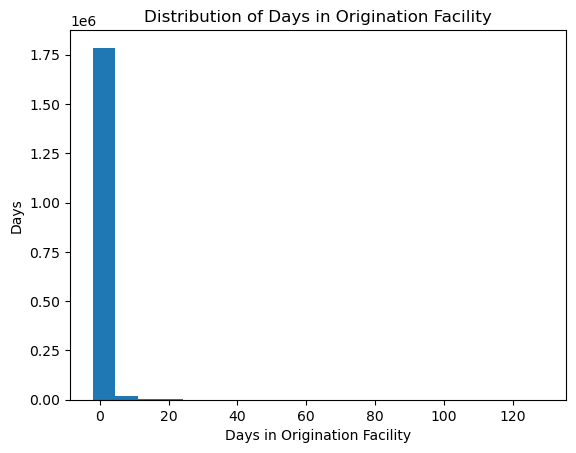

In [293]:
plt.hist(originatingPeices_6.select(pl.col('originationInterval')), bins=20)

plt.xlabel('Days in Origination Facility')
plt.ylabel('Days')
plt.title('Distribution of Days in Origination Facility')
plt.show()

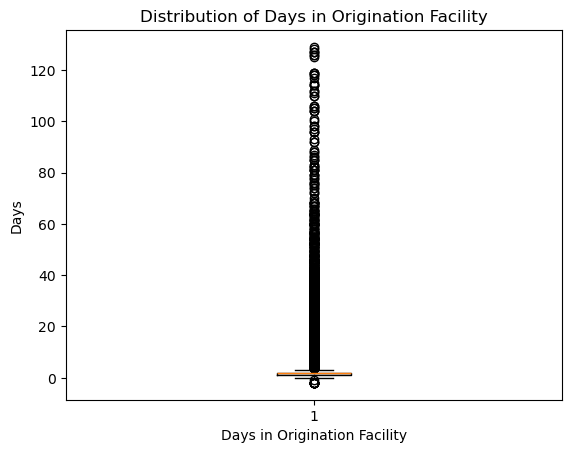

In [294]:
plt.boxplot(originatingPeices_6.select(pl.col('originationInterval')), meanline=True)

plt.xlabel('Days in Origination Facility')
plt.ylabel('Days')
plt.title('Distribution of Days in Origination Facility')
plt.show()

In [295]:
import scipy.stats as st

In [296]:
iqr = st.iqr(originatingPeices_6.select(pl.col('originationInterval')))
iqr

1.0

In [297]:
q3 = st.scoreatpercentile(originatingPeices_6.select(pl.col('originationInterval')), per=75)
q3

2.0

In [299]:
max= (q3 - 1.5 * iqr)
max

0.5

In [304]:
originatingPeices_7 = originatingPeices_6.filter((pl.col('originationInterval') < 5) &
                                                 (pl.col('originationInterval') > 0))

In [305]:
originatingPeices_7.count()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,EXPECTED_DESTINATION_FACILITY,MAIL_CLASS,MAIL_SHAPE,maxScan,originationInterval,oneFacility
u32,u32,u32,u32,u32,u32,u32,u32,u32
1778663,1778663,1778663,1778663,1778663,1778663,1778663,1778663,1778663


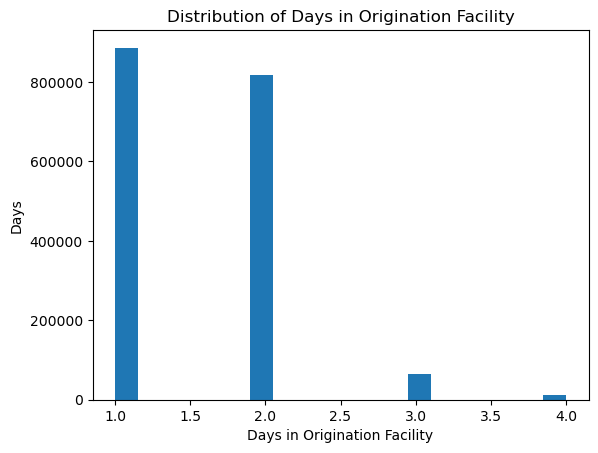

In [306]:
plt.hist(originatingPeices_7.select(pl.col('originationInterval')), bins=20)

plt.xlabel('Days in Origination Facility')
plt.ylabel('Days')
plt.title('Distribution of Days in Origination Facility')
plt.show()

In [308]:
originatingPeices_8 = originatingPeices_7.with_columns([pl.col(i).rank('dense').cast(pl.Int64).suffix('_encoded') for i in ['EXPECTED_DESTINATION_FACILITY', 'MAIL_CLASS', 'MAIL_SHAPE']])

/var/folders/r6/6lnhxb15071_vwfk77wkdc9m0000gn/T/ipykernel_922/798443399.py:1: DeprecationWarning: `suffix` is deprecated. It has been moved to `name.suffix`.
  originatingPeices_8 = originatingPeices_7.with_columns([pl.col(i).rank('dense').cast(pl.Int64).suffix('_encoded') for i in ['EXPECTED_DESTINATION_FACILITY', 'MAIL_CLASS', 'MAIL_SHAPE']])


In [309]:
originatingPeices_8.head()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,ORIGIN_FACILITY,EXPECTED_DESTINATION_FACILITY,MAIL_CLASS,MAIL_SHAPE,maxScan,originationInterval,oneFacility,EXPECTED_DESTINATION_FACILITY_encoded,MAIL_CLASS_encoded,MAIL_SHAPE_encoded
i64,i64,str,str,str,str,i64,i64,i32,i64,i64,i64
287408501836752,19733,"""MUSIC CITY ANNEX - 1532174""","""MUSIC CITY ANNEX - 1532174""","""USPS Marketing Mail""","""Flat""",19734,2,1,96,4,2
287744641281334,19742,"""MUSIC CITY ANNEX - 1532174""","""MUSIC CITY ANNEX - 1532174""","""Periodicals""","""Flat""",19743,2,1,96,2,2
287810450733073,19741,"""MUSIC CITY ANNEX - 1532174""","""MUSIC CITY ANNEX - 1532174""","""USPS Marketing Mail""","""Flat""",19741,1,1,96,4,2
287407400187497,19734,"""MUSIC CITY ANNEX - 1532174""","""MUSIC CITY ANNEX - 1532174""","""USPS Marketing Mail""","""Flat""",19734,1,1,96,4,2
287527460559020,19741,"""MUSIC CITY ANNEX - 1532174""","""MUSIC CITY ANNEX - 1532174""","""Periodicals""","""Flat""",19741,1,1,96,2,2


In [310]:
originatingPeices_9 = originatingPeices_8.select(pl.col('UNIQUE_IDENTIFIER'),
                                                 pl.col('START_THE_CLOCK_DATE').cast(pl.Date),
                                                 pl.col('originationInterval'),
                                                 pl.col('oneFacility'),
                                                 pl.col('EXPECTED_DESTINATION_FACILITY_encoded'),
                                                 pl.col('MAIL_CLASS_encoded'),
                                                 pl.col('MAIL_SHAPE_encoded'))

In [313]:
originatingPeices_9['START_THE_CLOCK_DATE'].min()

datetime.date(2024, 1, 8)

In [314]:
originatingPeices_9['START_THE_CLOCK_DATE'].max()

datetime.date(2024, 1, 21)

In [348]:
originatingPeices_9.group_by('originationInterval').len()

originationInterval,len
i64,u32
3,64342
4,10889
2,817228
1,886204


In [315]:
weather = pl.read_csv('../Weather_Data/10dayforcast.csv', try_parse_dates=True)

In [316]:
weather.head()

DATE,Day0_PRCP,Day1_PRCP,Day2_PRCP,Day3_PRCP,Day4_PRCP,Day5_PRCP,Day6_PRCP,Day7_PRCP,Day8_PRCP,Day9_PRCP,Day10_PRCP,Day0_SNOW,Day1_SNOW,Day2_SNOW,Day3_SNOW,Day4_SNOW,Day5_SNOW,Day6_SNOW,Day7_SNOW,Day8_SNOW,Day9_SNOW,Day10_SNOW,Day0_SNWD,Day1_SNWD,Day2_SNWD,Day3_SNWD,Day4_SNWD,Day5_SNWD,Day6_SNWD,Day7_SNWD,Day8_SNWD,Day9_SNWD,Day10_SNWD
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""1/8/24""",0.0,0.625,0.02,0.0,0.646667,0.105,0.0,0.415,0.175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,2.1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,4.5,4.0
"""1/9/24""",0.625,0.02,0.0,0.646667,0.105,0.0,0.415,0.175,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,3.2,2.1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,4.5,4.0,2.5
"""1/10/24""",0.02,0.0,0.646667,0.105,0.0,0.415,0.175,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,3.2,2.1,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,4.5,4.0,2.5,2.0
"""1/11/24""",0.0,0.646667,0.105,0.0,0.415,0.175,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,3.2,2.1,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,5.2,4.5,4.0,2.5,2.0,2.0
"""1/12/24""",0.646667,0.105,0.0,0.415,0.175,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,3.2,2.1,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,5.2,4.5,4.0,2.5,2.0,2.0,1.5


In [317]:
weather = weather.with_columns(pl.col('DATE').str.to_date('%m/%d/%y'))

In [318]:
weather.head()

DATE,Day0_PRCP,Day1_PRCP,Day2_PRCP,Day3_PRCP,Day4_PRCP,Day5_PRCP,Day6_PRCP,Day7_PRCP,Day8_PRCP,Day9_PRCP,Day10_PRCP,Day0_SNOW,Day1_SNOW,Day2_SNOW,Day3_SNOW,Day4_SNOW,Day5_SNOW,Day6_SNOW,Day7_SNOW,Day8_SNOW,Day9_SNOW,Day10_SNOW,Day0_SNWD,Day1_SNWD,Day2_SNWD,Day3_SNWD,Day4_SNWD,Day5_SNWD,Day6_SNWD,Day7_SNWD,Day8_SNWD,Day9_SNWD,Day10_SNWD
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2024-01-08,0.0,0.625,0.02,0.0,0.646667,0.105,0.0,0.415,0.175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,2.1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,4.5,4.0
2024-01-09,0.625,0.02,0.0,0.646667,0.105,0.0,0.415,0.175,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,3.2,2.1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,4.5,4.0,2.5
2024-01-10,0.02,0.0,0.646667,0.105,0.0,0.415,0.175,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,3.2,2.1,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,4.5,4.0,2.5,2.0
2024-01-11,0.0,0.646667,0.105,0.0,0.415,0.175,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,3.2,2.1,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,5.2,4.5,4.0,2.5,2.0,2.0
2024-01-12,0.646667,0.105,0.0,0.415,0.175,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,3.2,2.1,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,5.2,4.5,4.0,2.5,2.0,2.0,1.5


In [319]:
dfModel = originatingPeices_9.join(weather, left_on='START_THE_CLOCK_DATE', right_on='DATE')

In [320]:
dfModel.head()

UNIQUE_IDENTIFIER,START_THE_CLOCK_DATE,originationInterval,oneFacility,EXPECTED_DESTINATION_FACILITY_encoded,MAIL_CLASS_encoded,MAIL_SHAPE_encoded,Day0_PRCP,Day1_PRCP,Day2_PRCP,Day3_PRCP,Day4_PRCP,Day5_PRCP,Day6_PRCP,Day7_PRCP,Day8_PRCP,Day9_PRCP,Day10_PRCP,Day0_SNOW,Day1_SNOW,Day2_SNOW,Day3_SNOW,Day4_SNOW,Day5_SNOW,Day6_SNOW,Day7_SNOW,Day8_SNOW,Day9_SNOW,Day10_SNOW,Day0_SNWD,Day1_SNWD,Day2_SNWD,Day3_SNWD,Day4_SNWD,Day5_SNWD,Day6_SNWD,Day7_SNWD,Day8_SNWD,Day9_SNWD,Day10_SNWD
i64,date,i64,i32,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
287408501836752,2024-01-11,2,1,96,4,2,0.0,0.646667,0.105,0.0,0.415,0.175,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,3.2,2.1,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,5.2,4.5,4.0,2.5,2.0,2.0
287744641281334,2024-01-20,2,1,96,2,2,0.0,0.0,0.0,0.0,0.283333,0.366667,0.685,0.306667,0.11,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287810450733073,2024-01-19,1,1,96,4,2,0.16,0.0,0.0,0.0,0.0,0.283333,0.366667,0.685,0.306667,0.11,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.5,2.0,2.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287407400187497,2024-01-12,1,1,96,4,2,0.646667,0.105,0.0,0.415,0.175,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,3.2,2.1,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,5.2,4.5,4.0,2.5,2.0,2.0,1.5
287527460559020,2024-01-19,1,1,96,2,2,0.16,0.0,0.0,0.0,0.0,0.283333,0.366667,0.685,0.306667,0.11,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.5,2.0,2.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [321]:
dfModel = dfModel.drop(['UNIQUE_IDENTIFIER', 'START_THE_CLOCK_DATE'])

In [389]:
import sklearn
from sklearn.utils import resample,shuffle
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler

In [361]:
day_1 = dfModel.filter(pl.col('originationInterval') == 1)

In [362]:
day_2 = dfModel.filter(pl.col('originationInterval') == 2)

In [363]:
day_3 = dfModel.filter(pl.col('originationInterval') == 3)

In [364]:
day_4 = dfModel.filter(pl.col('originationInterval') == 4)

In [366]:
day_1_resample = resample(day_1, random_state=96, n_samples=25000, replace=True)


In [367]:
day_2_resample = resample(day_2, random_state=96, n_samples=25000, replace=True)

In [368]:
day_3_resample = resample(day_3, random_state=96, n_samples=25000, replace=True)

In [369]:
day_4_resample = resample(day_4, random_state=96, n_samples=25000, replace=True)

In [371]:
df_resampled = pl.concat([day_1_resample, day_2_resample, day_3_resample, day_4_resample])

In [372]:
df_resampled.count()

originationInterval,oneFacility,EXPECTED_DESTINATION_FACILITY_encoded,MAIL_CLASS_encoded,MAIL_SHAPE_encoded,Day0_PRCP,Day1_PRCP,Day2_PRCP,Day3_PRCP,Day4_PRCP,Day5_PRCP,Day6_PRCP,Day7_PRCP,Day8_PRCP,Day9_PRCP,Day10_PRCP,Day0_SNOW,Day1_SNOW,Day2_SNOW,Day3_SNOW,Day4_SNOW,Day5_SNOW,Day6_SNOW,Day7_SNOW,Day8_SNOW,Day9_SNOW,Day10_SNOW,Day0_SNWD,Day1_SNWD,Day2_SNWD,Day3_SNWD,Day4_SNWD,Day5_SNWD,Day6_SNWD,Day7_SNWD,Day8_SNWD,Day9_SNWD,Day10_SNWD
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000


In [328]:
x = dfModel.drop('originationInterval')

In [373]:
y = dfModel['originationInterval']

In [330]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, train_size=.7, random_state=96)

In [333]:
rf = RandomForestClassifier()

In [334]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [335]:
y_pred = rf.predict(x_test)

In [336]:
y_pred

array([2, 1, 2, ..., 2, 2, 2])

In [338]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7108840158995801


In [340]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

In [341]:
rf_tuned = RandomForestClassifier()

In [343]:
rand_search = RandomizedSearchCV(rf_tuned, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

In [344]:
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc1bfd72130>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbebbb10b20>})

In [345]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 384}


In [346]:
y_pred_tuned = best_rf.predict(x_test)

In [347]:
accuracy = accuracy_score(y_test, y_pred_tuned)
print("Accuracy:", accuracy)

Accuracy: 0.7102786924263351


In [374]:
x_resampled = df_resampled.drop('originationInterval')

In [375]:
y_resampled = df_resampled['originationInterval']

In [376]:
x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(x, 
                                                                                            y, 
                                                                                            test_size=.3, 
                                                                                            train_size=.7, 
                                                                                            random_state=96)

In [377]:
rf = RandomForestClassifier()

In [378]:
rf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [382]:
y_pred = rf.predict(x_test_resampled)

In [383]:
y_pred

array([2, 1, 2, ..., 2, 2, 2])

In [384]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7108933862319832


In [403]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [385]:
NN_model = Sequential()

In [386]:
# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

/opt/anaconda3/envs/env_capstone/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [247]:
# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

In [387]:
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

In [249]:
NN_model.compile(optimizer=Adam(lr=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,729 (663.00 KB)

 Trainable params: 169,729 (663.00 KB)

 Non-trainable params: 0 (0.00 B)

In [253]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.keras' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [258]:
NN_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/5
36184/36207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4624 - mean_absolute_error: 0.4624
Epoch 1: val_loss improved from 0.49486 to 0.43910, saving model to Weights-001--0.43910.keras
36207/36207 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - loss: 0.4624 - mean_absolute_error: 0.4624 - val_loss: 0.4391 - val_mean_absolute_error: 0.4391
Epoch 2/5
36194/36207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4572 - mean_absolute_error: 0.4572
Epoch 2: val_loss improved from 0.43910 to 0.43846, saving model to Weights-002--0.43846.keras
36207/36207 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.4571 - mean_absolute_error: 0.4571 - val_loss: 0.4385 - val_mean_absolute_error: 0.4385
Epoch 3/5
36200/36207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4417 - mean_absolute_error: 0.4417
Epoch 3: val_loss improved from 0.43846 to 0.43418, saving model to Weights-003--0.43418.keras
36207/36207 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - loss: 0.4417 - mean_absolute_error: 0.4417 - val_loss: 0.4342 - val_mean_absolu

In [259]:
predictions = NN_model.predict(x_test)

11315/11315 ━━━━━━━━━━━━━━━━━━━━ 11s 940us/step


In [260]:
NN_r2 = r2_score(y_test, predictions)
NN_r2

-0.0011277489265306695